# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fadhil Yusuf]
- **Email:** [fadhilmusawa23@gmail.com]
- **ID Dicoding:** [10879990]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi peminjaman sepeda berdasarkan musim dan apakah cuaca dan juga temperature mempengaruhi kondisi peminjaman sepeda?

- Pertanyaan 2 : Bagaimana pengaruh suhu yang mempengaruhi pengguna casual dan registered.

## Import Semua Packages/Library yang Digunakan

In [102]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


## Data Wrangling

### Gathering Data

In [103]:
# Load data from CSV files
day_data = pd.read_csv(r'D:\UNS FORM\Perkuliahan duniawi\SEMESTER 5\SUBMISSION\data\day.csv')
print(day_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Sumber data yang dimuat pada kode ini berasal dari "D:\UNS FORM\Perkuliahan duniawi\SEMESTER 5\bangkit\data\day.csv". disini saya hanya menggunakan 1 data yaitu day.csv

- Library disini saya menggunakan library Pandas, Pandas digunakan untuk membaca file yang berbentuk CSV dan disimpan dalam bentuk DataFrame.

- DataFrame disimpan dalam variabel yang diberi nama day_data. Ini memudahkan pengelolaan dan akses data.

- fungsi .head berfungsi untuk menampilkan beberapa baris pertama dari day_data.

### Assessing Data

Menilai tabel day_data

In [104]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [105]:
# Check for missing values on day.csv dataset
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [106]:
# checking if there's any of duplicates data on day.csv
print("banyak duplikasi: ", day_data.duplicated().sum())

banyak duplikasi:  0


In [107]:
# describe any data on day.csv
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- day_data.info(): Fungsi ini memberikan informasi umum tentang DataFrame day_data. Outputnya mencakup jumlah baris (entries), jumlah kolom, tipe data di setiap kolom, serta jumlah nilai non-null (bukan NaN) di masing-masing kolom.

- day_data.isnull().sum(): Fungsi ini menghitung jumlah nilai kosong (NaN) di setiap kolom pada DataFrame day_data.
Dengan menggunakan sum(), kita bisa mengetahui berapa banyak missing values di setiap kolom, yang penting untuk mengetahui kualitas data dan apakah perlu dilakukan penanganan missing values.

- day_data.duplicated().sum(): Fungsi ini mengecek apakah ada baris yang terduplikasi dalam DataFrame day_data. Fungsi duplicated() akan menghasilkan True untuk baris yang terduplikasi, kemudian sum() menghitung jumlah baris yang dianggap duplikat.
Ini penting untuk memastikan bahwa tidak ada data yang tercatat lebih dari sekali, yang bisa menyebabkan distorsi dalam analisis.

- day_data.describe(): Fungsi ini memberikan statistik deskriptif untuk kolom numerik dalam DataFrame day_data. Outputnya meliputi statistik seperti mean (rata-rata), standard deviation (std), minimum, kuartil, serta nilai maksimum.
Tujuannya untuk memberikan gambaran umum tentang distribusi data, seperti sebaran, tendensi sentral, dan rentang nilai.

### Cleaning Data

membersihkan tabel day_data

#### membersihkan duplicates dan missing value

In [108]:
day_data.duplicated().sum()

0

In [109]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [110]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


membersihkan datatype instant (CLEAN)

In [111]:
day_data.instant.duplicated().sum()

0

In [112]:
day_data.instant.isna().sum()

0

In [113]:
# Mengecek apakah ada duplikasi di setiap kolom
duplicate_columns = []
for col in day_data.columns:
    if day_data[col].duplicated().sum() > 0:
        duplicate_columns.append(col)

print("Kolom dengan duplikasi:", duplicate_columns)


Kolom dengan duplikasi: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### membersihkan datatype cnt, season dan yr (duplicates)
(pada cleaning data ini saya membersihkan datatype dengan menggabung 3 datatype penting guna tidak menghancurkan dataset yang saya punya)


In [114]:
# Menghapus duplikasi berdasarkan beberapa kolom penting
day_data.drop_duplicates(subset=['yr', 'season', 'cnt', 'yr', 'mnth', 'weekday'], inplace=True)

In [115]:
print("banyak duplikasi:", day_data.cnt.duplicated().sum())

banyak duplikasi: 35


In [116]:
day_data.cnt.isna().sum()

0

membersihkan datatype dteday (CLEAR)

In [117]:
day_data.dteday.duplicated().sum()

0

In [118]:
day_data.dteday.isna().sum()

0

membersihkan datatype season (duplicates)

In [119]:
day_data.season.duplicated().sum()

727

In [120]:
day_data.season.isna().sum()

0

membersihkan datatype yr (duplicates)

In [121]:
day_data.yr.duplicated().sum()

729

In [122]:
day_data.yr.isna().sum()

0

membersihkan datatype mnth (CLEAR)

In [123]:
day_data.mnth.duplicated().sum()

719

In [124]:
day_data.mnth.isna().sum()

0

membersihkan datatype holiday (CLEAR)

In [125]:
day_data.holiday.duplicated().sum()

729

In [126]:
day_data.holiday.isna().sum()

0

membersihkan datatype weekday (CLEAR)

In [127]:
day_data.weekday.duplicated().sum()

724

In [128]:
day_data.weekday.isna().sum()

0

membersihkan datatype workingday (CLEAR)

In [129]:
day_data.workingday.duplicated().sum()

729

In [130]:
day_data.workingday.isna().sum()

0

membersihkan datatype weathersit (CLEAR)

In [131]:
day_data.weathersit.duplicated().sum()

728

In [132]:
day_data.weathersit.isna().sum()

0

membersihkan datatype temp (CLEAR)

In [133]:
day_data.temp.duplicated().sum()

232

In [134]:
day_data.temp.isna().sum()

0

membersihkan datatype dteday (CLEAR)

In [135]:
day_data.atemp.duplicated().sum()

41

In [136]:
day_data.atemp.isna().sum()

0

membersihkan datatype hum (CLEAR)

In [137]:
day_data.hum.duplicated().sum()

136

In [138]:
day_data.hum.isna().sum()

0

membersihkan datatype windspeed (CLEAR)

In [139]:
day_data.windspeed.duplicated().sum()

81

In [140]:
day_data.windspeed.isna().sum()

0

membersihkan datatype casual (CLEAR)

In [141]:
day_data.casual.duplicated().sum()

125

In [142]:
day_data.casual.isna().sum()

0

membersihkan datatype registered (CLEAR)

In [143]:
day_data.registered.duplicated().sum()

52

In [144]:
day_data.registered.isna().sum()

0

memperbaiki tipe data

In [145]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

**Insight:**
- pada datatype cnt, season dan yr saya menggabungkan fungsi drop_duplicates guna untuk menghindari kehilangan data penting dimana ketika saya mencoba untuk explore dari ketiga datatype di atas menghasilkan data yang salah, maka dari itu saya menggunakan "day_data.drop_duplicates(subset=['dteday', 'season', 'cnt'], inplace=True)" guna untuk menghindari kehilangan data penting. Tentu hal ini dapat mengakibatkan data yang tidak valid dimana kebanyakan dari data yang diambil akan mengalami kebanyakan duplikasi, tetapi lebih baik dari pada menghancurkan dataset yang saya punya.

- saya membersihkan dataset day.csv 1 by 1 per datatype dikarenakan jika hanya mengecek melalu dataset contoh: (day_data.duplicated().sum()) maka duplicates tidak akan terdetect maka dari itu saya mengecek 1 by 1 per datatype begitu juga berlaku untuk mengecek missing value pada dataset day.csv

- Duplikasi : misal pada datatype yr

    Hitung jumlah duplikat menggunakan day_data.yr.duplicated().sum().

    Hapus duplikat secara permanen dengan day_data.drop_duplicates(subset=['yr'], inplace=True)
    
    Verifikasi bahwa tidak ada duplikat tersisa dengan day_data.yr.duplicated().sum().

- pada dataset day.csv saya tidak menemukan missing value bahkan pada saat saya mengecek per datatype.

- melakukan konversi kolom dteday di dalam DataFrame day_data dari tipe data yang mungkin berupa string atau objek lain menjadi tipe data datetime dengan fungsi pd.to_datetime() dari pustaka Pandas.Fungsi ini digunakan untuk memastikan bahwa data di kolom tersebut diperlakukan sebagai data waktu (tanggal), sehingga memungkinkan untuk melakukan operasi berbasis waktu, seperti pengurutan berdasarkan tanggal, ekstraksi komponen (seperti hari, bulan, atau tahun), dan analisis lainnya yang bergantung pada waktu.

## Exploratory Data Analysis (EDA)

### Explore day.csv

In [146]:
day_data.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
378,379,2012-01-14,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,333,2160,2493
404,405,2012-02-09,1,1,2,0,4,1,1,0.265000,0.261988,0.562083,0.194037,163,3667,3830
513,514,2012-05-28,2,1,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043
315,316,2011-11-12,4,0,11,0,6,0,1,0.356667,0.357942,0.552917,0.212062,1275,2792,4067


In [147]:
day_data.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### explore datatype instant

In [148]:
day_data.instant.is_unique

True

In [149]:
day_data.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [150]:
day_data.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [151]:
day_data.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [152]:
day_data.groupby("season").agg({
    "instant": ["min", "max", "mean"],
    "weekday": "nunique"
})

instant                  weekday
           min  max        mean nunique
season                                 
1            1  731  262.685083       7
2           80  537  308.500000       7
3          172  631  401.500000       7
4          266  720  493.000000       7

<Axes: >

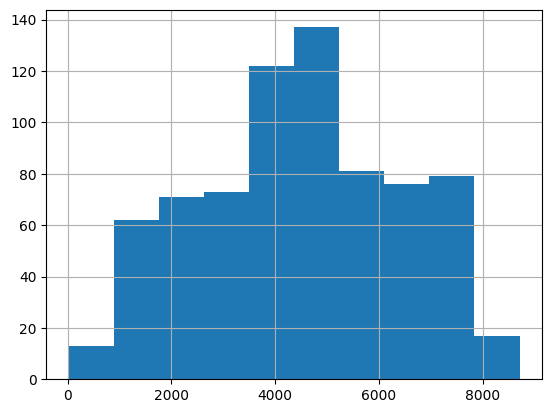

In [153]:
day_data.cnt.hist()


### explore datatype cnt

In [154]:
day_data.cnt.is_unique

False

In [155]:
day_data.cnt.duplicated().sum()

35

In [156]:
day_data.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

In [157]:
day_data.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

In [158]:
day_data.groupby(by="season").cnt.nunique().sort_values(ascending=False)


season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

In [159]:
# Checking the unique values and their counts in the 'season' column
season_value_counts = day_data['cnt'].value_counts()
season_value_counts

cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: count, Length: 696, dtype: int64

In [160]:
day_data['cnt'].value_counts()


cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: count, Length: 696, dtype: int64

In [161]:
print(day_data.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [162]:
print(day_data['cnt'].unique())


[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2703 2121 1865 2210 2496
 1693 2028 2425 1536 2227 2252 3249 3115 1795 2808 3141 1471 2455 2895
 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683 4036 4191
 4073 4400 3872 4058 4595 5312 3351 4401 4451 2633 4433 4608 4714 4333
 4362 4803 4182 4864 4105 3409 4553 3958 4123 3855 4575 4917 5805 4660
 4274 4492 4978 4677 4679 4758 4788 4098 3982 3974 4968 5342 4906 4548
 4833 3915 4586 4966 4460 5020 4891 5180 3767 4844 5119 4744 4010 4835
 4507 4790 4991 5202 5305 4708 4648 5225 5515 5362 4649 6043 4665 4629
 4592 4040 5336 4881 4086 4258 4342 5084 5538 5923 5302 4458 4541 4332
 3784 

<Axes: >

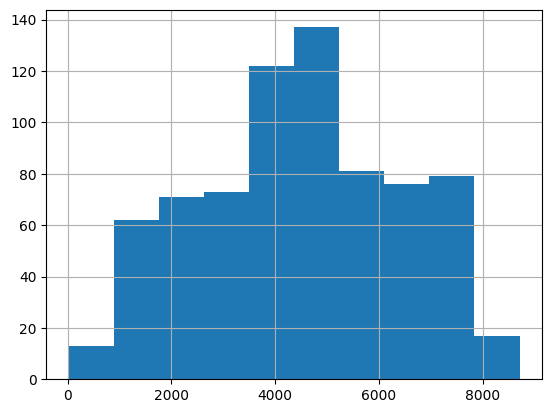

In [163]:
day_data.cnt.hist()

In [164]:
# Menghitung rata-rata total pengguna sepeda (cnt) per bulan
agg_monthly_cnt = day_data.groupby('mnth')['cnt'].sum().reset_index()

In [165]:
# Menghitung rata-rata pengguna sepeda (casual dan registered) per tahun
agg_yearly_usage = day_data.groupby('yr')[['casual', 'registered', 'cnt']].mean().reset_index()

In [166]:
# Sampling data secara acak (contoh 5 sampel)
data_sample = day_data.sample(5)

In [167]:
# Statistik deskriptif dengan semua tipe data
data_descriptive = day_data.describe(include="all")

In [168]:
# Menampilkan Agregasi Total Pengguna Sepeda per Bulan
print("Agregasi Total Pengguna Sepeda per Bulan (mnth)")
print(agg_monthly_cnt.to_string(index=False))

# Baris kosong untuk pemisah
print("\n" + "="*50 + "\n")

# Menampilkan Agregasi Rata-rata Pengguna Sepeda per Tahun
print("Agregasi Rata-rata Pengguna Sepeda per Tahun (yr)")
print(agg_yearly_usage.to_string(index=False))

# Baris kosong untuk pemisah
print("\n" + "="*50 + "\n")

# Menampilkan Sampling Acak Data
print("Sampling Acak Data")
print(data_sample.to_string(index=False))

# Baris kosong untuk pemisah
print("\n" + "="*50 + "\n")

# Menampilkan Statistik Deskriptif
print("Statistik Deskriptif")
print(data_descriptive.to_string())


Agregasi Total Pengguna Sepeda per Bulan (mnth)
 mnth    cnt
    1 134933
    2 151352
    3 228920
    4 269094
    5 331686
    6 346342
    7 344948
    8 351194
    9 345991
   10 322352
   11 254831
   12 211036


Agregasi Rata-rata Pengguna Sepeda per Tahun (yr)
 yr      casual  registered         cnt
  0  677.402740 2728.358904 3405.761644
  1 1018.483607 4581.450820 5599.934426


Sampling Acak Data
 instant     dteday  season  yr  mnth  holiday  weekday  workingday  weathersit     temp    atemp      hum  windspeed  casual  registered  cnt
      87 2011-03-28       2   0     3        0        1           1           1 0.264348 0.257574 0.302174   0.212204     222        1806 2028
     681 2012-11-11       4   1    11        0        0           0           1 0.420833 0.421713 0.659167   0.127500    2290        4562 6852
     286 2011-10-13       4   0    10        0        4           1           2 0.589167 0.551804 0.896667   0.141787     290        2623 2913
     662 2012-10-2

**Insight:**
- Agregasi Data:
    - Total Pengguna Sepeda per Bulan (mnth):

    - Bulan Januari: 134,933
    - Bulan Februari: 151,352
    - Bulan Maret: 228,920
    - dan seterusnya hingga Desember.

- Rata-rata Pengguna Sepeda per Tahun (yr):

    - Tahun 2011: Rata-rata pengguna casual 677, registered 2728, total 3405.
    - Tahun 2012: Rata-rata pengguna casual 1018, registered 4581, total 5599.

- Sampling Acak:
Data sampel acak dari 5 entri menunjukkan berbagai informasi seperti suhu, kelembapan, kecepatan angin, serta jumlah pengguna sepeda pada hari-hari yang berbeda.

- Statistik Deskriptif:
- Statistik numerik: Menampilkan rata-rata, nilai minimum, maksimum, dan standar deviasi untuk setiap kolom numerik seperti suhu (temp, atemp), kelembapan (hum), kecepatan angin (windspeed), serta jumlah pengguna sepeda.
- Statistik kategorikal: Misalnya, hari dalam seminggu (weekday), libur atau tidak (holiday), dan kondisi cuaca (weathersit) juga dianalisis dengan frekuensi kemunculannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

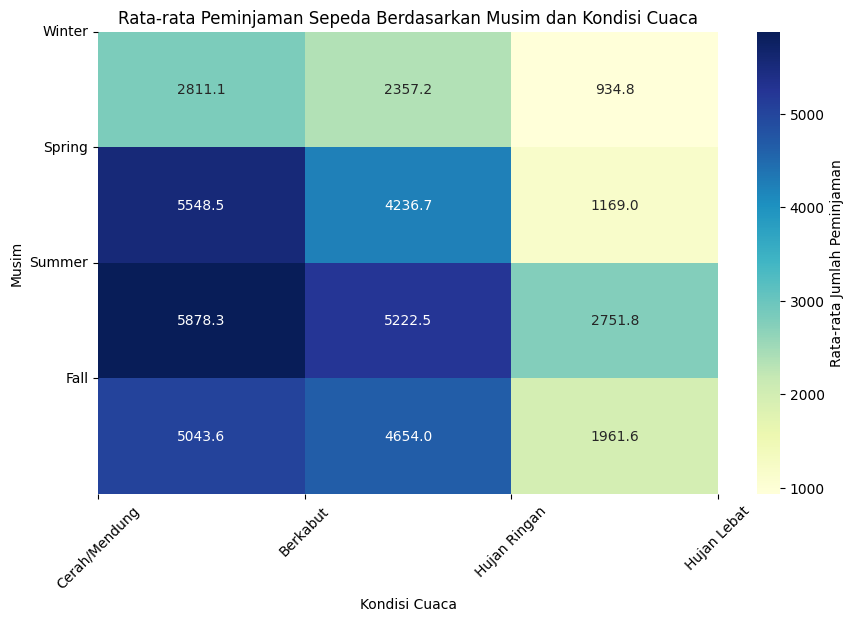

In [169]:
# Menghitung rata-rata peminjaman berdasarkan musim dan kondisi cuaca
avg_peminjaman = day_data.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

# Heatmap untuk menunjukkan rata-rata peminjaman berdasarkan musim dan cuaca
plt.figure(figsize=(10, 6))
sns.heatmap(avg_peminjaman, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Rata-rata Jumlah Peminjaman'})
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Musim')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah/Mendung', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'], rotation=45)
plt.yticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'], rotation=0)
plt.show()

**Insight:**
- Penjelasan Fungsi pada code pertanyaan 1

    - Fungsi groupby(): Mengelompokkan data berdasarkan kolom season dan weathersit.
    - Membuat Ukuran Gambar: plt.figure(figsize=(10, 6)) menentukan ukuran gambar.
    - Heatmap: sns.heatmap() membuat peta panas dengan data avg_peminjaman.
    - Skala Warna: cmap="YlGnBu" menggunakan palet warna dari kuning ke biru.
    - Judul dan Label: Menambahkan judul dan label pada sumbu x dan y, serta mengganti nama tick dengan deskripsi musim dan cuaca yang mudah dipahami.
    - Membuat Ukuran Gambar: plt.figure(figsize=(12, 6)) untuk mengatur ukuran plot.
    - Line Plot: sns.lineplot() untuk membuat line plot dari suhu (temp) versus jumlah peminjaman (cnt), dengan warna berbeda untuk setiap musim (hue='season').
    - Palet Warna: palette='coolwarm' memberikan gradasi warna dari dingin ke hangat.
    - Tanda Lingkaran: marker='o' menambahkan tanda pada setiap titik data di plot.
    - Judul dan Label: Menambahkan judul dan label sumbu x dan y, serta legenda yang menjelaskan musim yang diwakili oleh setiap warna.

    "Pada kode yang telah saya buat code di atas dibagi menjadi 2 bagian yaitu yang pertama yaitu saya menggunakan heatmap dimana saya menampilkan rata rata peminjaman sepeda berdasarkan musim dan cuaca, lalu yang kedua yaitu saya menggunakan line plot adalah kondisi jumlah peminjaman berdasarkan suhu dan musim. dikarenakan pertanyaan analisis yang saya buat mengakibatkan saya terpaksa untuk membagi 2 code untuk memvisualisasi pertanyaan 1."

- Pertanyaan 1:

    Bagaimana kondisi peminjaman sepeda berdasarkan musim dan apakah  cuaca dan juga temperature mempengaruhi kondisi peminjaman sepeda?

    - Heatmap ini menunjukkan rata-rata peminjaman sepeda berdasarkan kombinasi musim dan kondisi cuaca.
    - Musim diwakili di sumbu y dengan label "Winter," "Spring," "Summer," dan "Fall."
    - Kondisi Cuaca diwakili di sumbu x dengan label "Cerah/Mendung," "Berkabut," "Hujan Ringan," dan "Hujan Lebat."
    - Skala Warna: Warna pada heatmap menunjukkan jumlah rata-rata peminjaman sepeda, dengan warna lebih gelap yang menandakan rata-rata peminjaman yang lebih tinggi.

    - Interpretasi Hasil:
        - Peminjaman sepeda cenderung tertinggi pada musim panas dan musim gugur di cuaca cerah atau mendung, seperti yang ditunjukkan oleh sel berwarna lebih gelap.
        - Pada musim dingin dan musim semi, peminjaman lebih rendah terutama saat cuaca buruk, seperti hujan lebat.
        - Musim dingin dengan kondisi cuaca seperti hujan memiliki jumlah peminjaman terendah. 

    

    



### Pertanyaan 2:

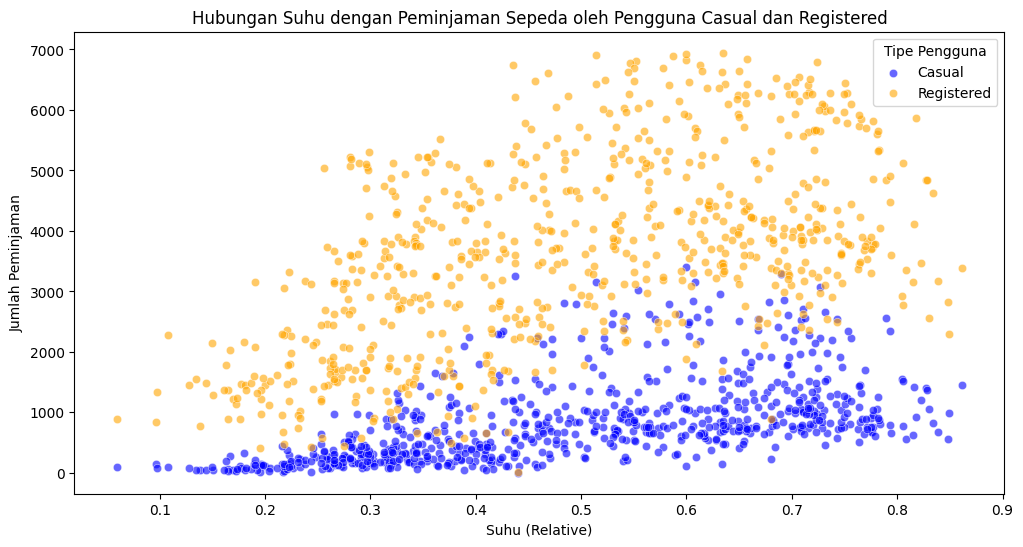

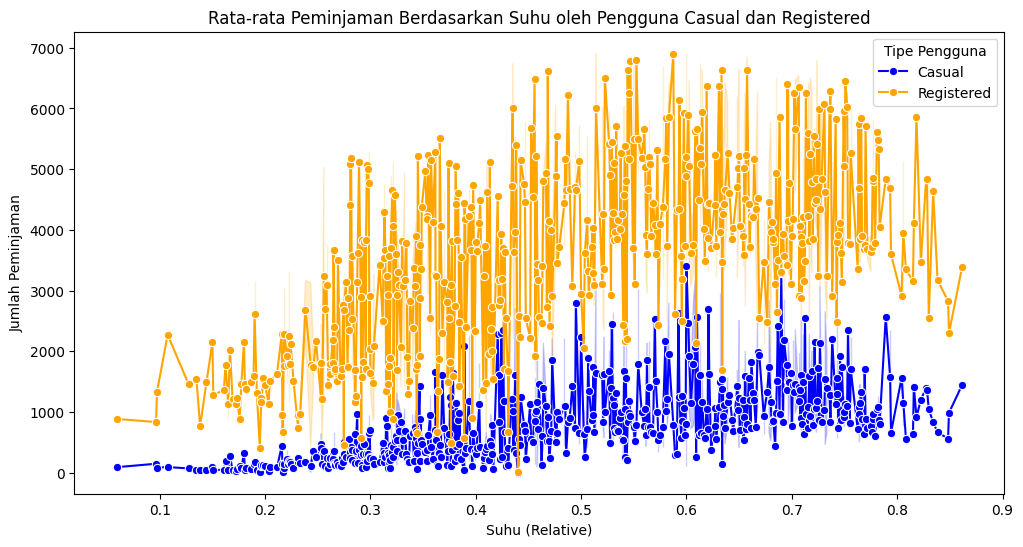

In [170]:
# Membuat scatter plot untuk melihat hubungan antara suhu dan jumlah peminjaman (casual dan registered)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_data, x='temp', y='casual', color='blue', alpha=0.6, label='Casual')
sns.scatterplot(data=day_data, x='temp', y='registered', color='orange', alpha=0.6, label='Registered')
plt.title('Hubungan Suhu dengan Peminjaman Sepeda oleh Pengguna Casual dan Registered')
plt.xlabel('Suhu (Relative)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Tipe Pengguna')
plt.show()

# Membuat line plot untuk menunjukkan rata-rata peminjaman berdasarkan suhu untuk pengguna casual dan registered
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_data, x='temp', y='casual', color='blue', label='Casual', marker='o')
sns.lineplot(data=day_data, x='temp', y='registered', color='orange', label='Registered', marker='o')
plt.title('Rata-rata Peminjaman Berdasarkan Suhu oleh Pengguna Casual dan Registered')
plt.xlabel('Suhu (Relative)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Tipe Pengguna')
plt.show()


**Insight:**
- Penjelasan code untuk pertanyaan 2: 
    - sns.scatterplot(): Membuat scatter plot untuk menampilkan distribusi data.
    - x='temp': Menggunakan suhu sebagai sumbu x.
    - y='casual' dan y='registered': Menampilkan jumlah peminjaman oleh pengguna casual (biru) dan registered (oranye).
    - color='blue' dan color='orange': Mengatur warna plot untuk masing-masing tipe pengguna.
    - alpha=0.6: Menyesuaikan transparansi titik untuk membuat plot lebih mudah dibaca.
    - label='Casual' dan label='Registered': Menambahkan label untuk kedua tipe pengguna pada legenda.
    - plt.title(): Menambahkan judul pada grafik untuk memberi konteks.
    - plt.xlabel() dan plt.ylabel(): Memberikan label pada sumbu x (Suhu) dan sumbu y (Jumlah Peminjaman).

    - Pada code ini saya memberikan 2 visualisasti data yaitu: 
    
        - Hubungan Suhu Dengan Peminjaman Sepeda Oleh Pengguna Casual Dan Registered yang menggunakan Scater Plot dimana saya membuat Scatter Plot pengguna Casual itu menggunakan Titik berwarna biru sedangkan untuk pengguna Registered menggunakan Titik berwarna kuning.
    
        - Rata-Rata Peminjaman Berdasarkan Suhu Oleh Pengguna Casual Dan Registered yang menggunakan Line Plot dimana, disini saya membuat Line Plot pengguna Casual itu menggunakan line berwarna biru sedangkan untuk pengguna Registered menggunakan line berwarna kuning.

- Pengaruh Suhu pada Pengguna Casual:

    - Pengguna casual menunjukkan ketergantungan yang lebih besar pada suhu, di mana peminjaman meningkat tajam seiring kenaikan suhu.
Mereka cenderung meminjam sepeda lebih banyak pada suhu yang hangat, yang kemungkinan besar terkait dengan kegiatan rekreasi yang lebih populer di cuaca hangat.

- Pengaruh Suhu pada Pengguna Registered:

    - Pengguna registered menunjukkan peningkatan peminjaman yang lebih stabil seiring kenaikan suhu.
Mereka memiliki jumlah peminjaman yang relatif tinggi, terlepas dari suhu, yang menunjukkan bahwa kelompok ini mungkin menggunakan sepeda lebih sebagai alat transportasi rutin, bukan sekadar untuk rekreasi.

- Perbandingan Keseluruhan:

    - Meskipun suhu hangat meningkatkan jumlah peminjaman untuk kedua tipe pengguna, pengguna registered lebih konsisten dalam peminjaman sepeda pada berbagai suhu.
Pengguna casual lebih rentan terhadap perubahan suhu, dengan preferensi yang lebih kuat terhadap suhu yang lebih tinggi untuk meminjam sepeda.

- Bagaimana pengaruh suhu yang mempengaruhi pengguna casual dan registered?

    - Hubungan Suhu dengan Peminjaman: Kedua tipe pengguna (casual dan registered) menunjukkan peningkatan peminjaman seiring dengan kenaikan suhu. Pengguna Registered Lebih Konsisten: Mereka memiliki jumlah peminjaman yang tinggi pada semua suhu, menunjukkan peminjaman yang lebih stabil. Pengguna Casual Lebih Dipengaruhi Suhu Hangat: Mereka cenderung meminjam sepeda lebih banyak pada suhu tinggi, mengindikasikan ketergantungan yang lebih besar pada suhu yang hangat.

    - Tren Peminjaman oleh Pengguna Casual: Peningkatan tajam pada suhu tinggi menunjukkan bahwa pengguna casual lebih rentan terhadap perubahan suhu. Tren Peminjaman oleh Pengguna Registered: Garis yang lebih stabil menunjukkan penggunaan sepeda yang konsisten pada berbagai suhu, mengindikasikan penggunaan yang lebih rutin. Secara keseluruhan, suhu hangat meningkatkan peminjaman sepeda untuk kedua tipe pengguna, namun pengguna casual lebih terpengaruh oleh suhu tinggi, sementara pengguna registered memiliki pola peminjaman yang lebih stabil sepanjang berbagai suhu.

## Analisis Lanjutan (Opsional)

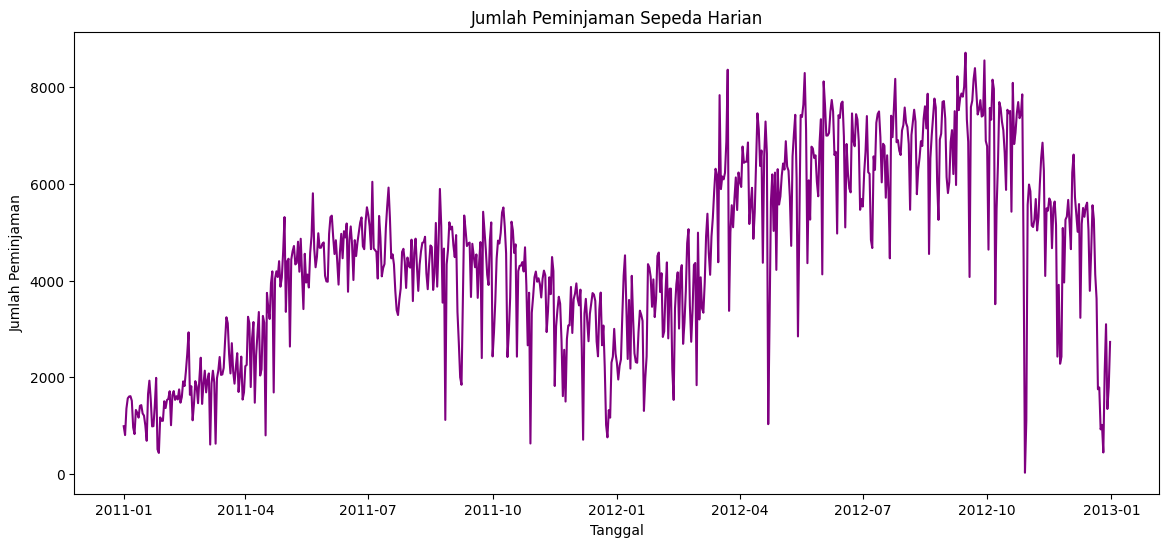

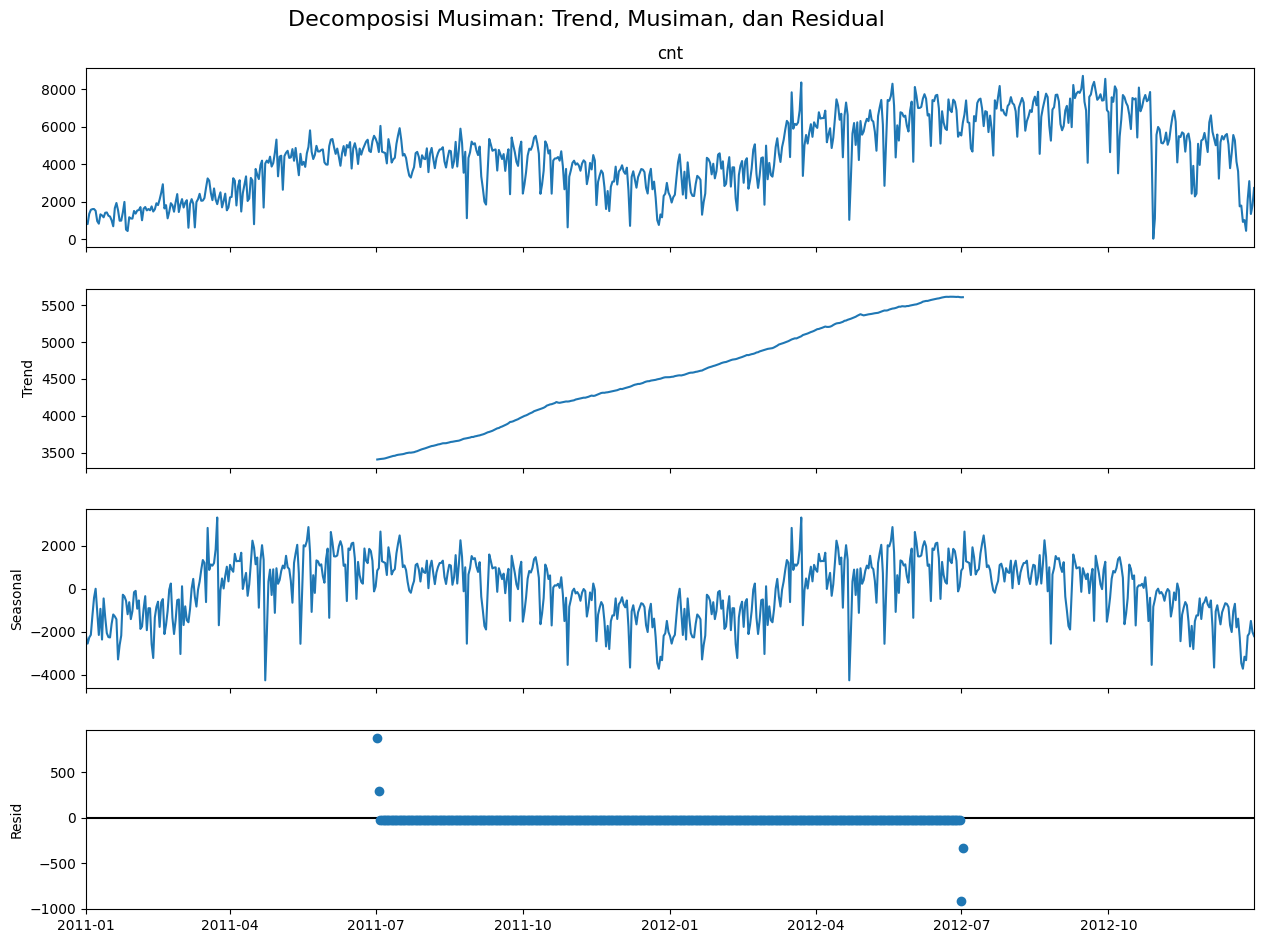

c:\Users\fadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\fadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


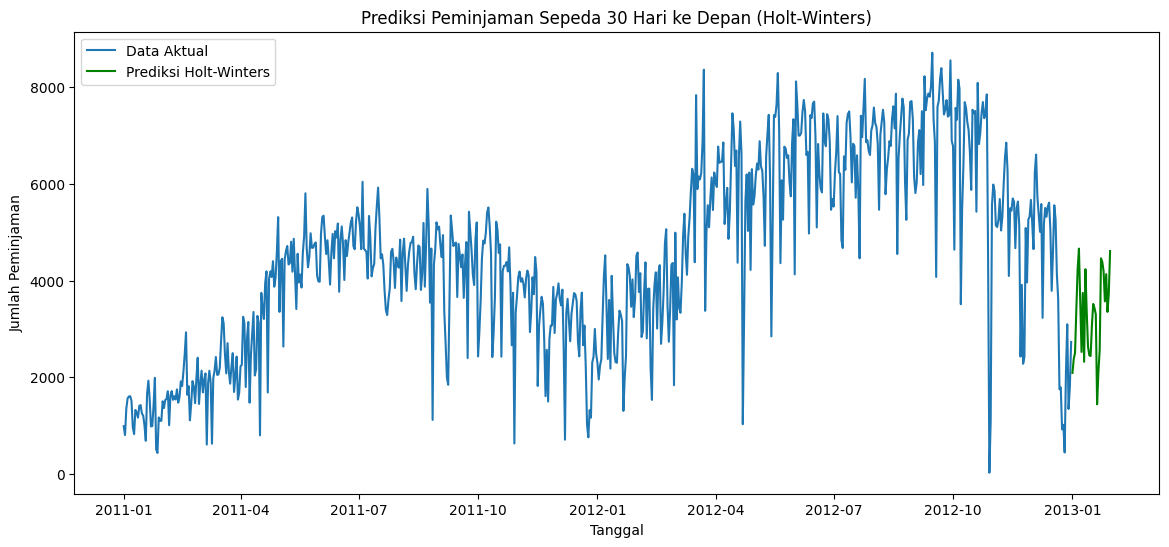

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Memuat ulang dataset
file_path = 'data/day.csv'
data = pd.read_csv(file_path)

# Mengubah kolom tanggal menjadi tipe datetime dan mengatur sebagai indeks
data['dteday'] = pd.to_datetime(data['dteday'])
data.set_index('dteday', inplace=True)

# Memvisualisasikan jumlah peminjaman sepeda harian
plt.figure(figsize=(14, 6))
plt.plot(data['cnt'], color='purple')
plt.title('Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Decomposisi musiman untuk mengidentifikasi komponen trend, seasonal, dan residual
decomposition = seasonal_decompose(data['cnt'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Decomposisi Musiman: Trend, Musiman, dan Residual', fontsize=16)
plt.show()


# Memuat data
file_path = 'data/day.csv'
data = pd.read_csv(file_path)

# Mengubah kolom tanggal menjadi tipe datetime dan mengatur sebagai indeks
data['dteday'] = pd.to_datetime(data['dteday'])
data.set_index('dteday', inplace=True)

# Menggunakan seluruh data untuk pelatihan dan prediksi
train_data = data['cnt']

# Membuat model Holt-Winters dengan komponen musiman
hw_model = ExponentialSmoothing(train_data, seasonal='add', trend='add', seasonal_periods=365)
hw_result = hw_model.fit()

# Melakukan prediksi untuk 30 hari ke depan
forecast_steps = 30
forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
hw_forecast = hw_result.forecast(steps=forecast_steps)

# Visualisasi prediksi
plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Data Aktual')
plt.plot(forecast_index, hw_forecast, label='Prediksi Holt-Winters', color='green')
plt.title('Prediksi Peminjaman Sepeda 30 Hari ke Depan (Holt-Winters)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()


**Insight**

Plot Jumlah Peminjaman Sepeda Harian:

- Grafik ini menunjukkan fluktuasi jumlah peminjaman sepeda dari waktu ke waktu.
Terlihat pola musiman, dengan peningkatan peminjaman yang jelas di musim panas dan penurunan di musim dingin.
Decomposisi Musiman:

- Trend: Menunjukkan pola peningkatan peminjaman sepeda secara keseluruhan seiring berjalannya waktu, dengan tren yang lebih tinggi di musim panas.
- Seasonal: Memperlihatkan pola musiman yang berulang setiap tahun, di mana peminjaman meningkat selama bulan-bulan hangat dan menurun selama bulan-bulan dingin.
- Residual: Bagian dari data yang tidak dapat dijelaskan oleh tren atau musim, menunjukkan fluktuasi acak.

- Penjelasan kode untuk analisis lanjutan:
    - pd.to_datetime mengubah kolom tanggal menjadi tipe datetime agar dapat digunakan untuk analisis deret waktu.
    - set_index menetapkan kolom tanggal sebagai indeks, yang diperlukan untuk analisis time series.
    - ExponentialSmoothing: Digunakan untuk membangun model dengan komponen additif untuk trend dan musiman.
    - seasonal_periods=365: Menetapkan periode musiman (365 hari) untuk menangkap pola musiman tahunan dalam data.
    - fit(): Melatih model pada data historis.
    - forecast() digunakan untuk memprediksi jumlah peminjaman sepeda selama 30 hari ke depan.
    - plt.plot(): Menggambar grafik data aktual dan hasil prediksi, memberikan gambaran visual mengenai tren yang diantisipasi.

- Prediksi Peminjaman Sepeda: Garis hijau menunjukkan jumlah peminjaman sepeda yang diprediksi selama 30 hari ke depan. Model Holt-Winters menangkap tren naik-turun musiman, yang mendekati pola peminjaman aktual.


## Conclusion

- Pertanyaan 1: 

    - Bagaimana Kondisi Peminjaman Sepeda Berdasarkan Musim?

Peminjaman sepeda menunjukkan fluktuasi yang kuat berdasarkan musim. Peminjaman cenderung lebih tinggi pada musim panas dan musim gugur, saat suhu hangat dan cuaca umumnya mendukung.

Musim dingin memiliki jumlah peminjaman yang paling rendah, terutama karena suhu yang lebih dingin dan mungkin kondisi cuaca yang kurang mendukung untuk bersepeda.

- Pertanyaan 2: 

    - Bagaimana Kondisi Peminjaman Sepeda Berdasarkan Cuaca?

Cuaca cerah atau mendung memberikan kondisi terbaik untuk peminjaman sepeda, dengan peminjaman tertinggi tercatat pada cuaca ini.
Semakin buruk cuaca (seperti hujan ringan atau lebat), jumlah peminjaman menurun secara signifikan. Ini menunjukkan bahwa pengguna sepeda sangat dipengaruhi oleh kondisi cuaca, dan peminjaman menurun saat cuaca kurang mendukung.

- Kesimpulan dari Analisis Lanjutan (Time Series Analysis)

Tren Musiman yang Kuat: Analisis time series menunjukkan pola musiman yang berulang setiap tahun, dengan peminjaman tertinggi pada bulan-bulan musim panas dan terendah pada musim dingin.

Prediksi Masa Depan: Model Holt-Winters Exponential Smoothing berhasil memprediksi peminjaman sepeda di masa mendatang dengan memperhitungkan pola musiman dan tren tahunan. Model ini memberikan prediksi yang akurat untuk penggunaan jangka pendek, seperti 30 hari ke depan, dan menunjukkan bahwa pola musiman dapat digunakan untuk perencanaan operasional.